# Human Resource Deparment

## Contexto

This data set presents an employee survey from IBM, indicating if there is attrition or not. The data set contains approximately 1500 entries. Given the limited size of the data set, the model should only be expected to provide modest improvement in indentification of attrition vs a random allocation of probability of attrition

El personal es la materia prima de un empresa, contratar personas que luego de unos meses pasan a dejar la empresa hace que la empresa pierda no solo tiempo sino tambien dinero. [more info](https://toggl.com/blog/cost-of-hiring-an-employee)

**Objetivos**
* Porque los empleados dejan la empresa?
* Cuales son las caracteristicas a tener en cuenta  y que favorecen que un candidato al puesto deje el trabajo?
* Como escoger a las personas correctas para la empresa.

**Conceptos a utilizar**
* Lenguaje de recursos humanos.
* Redes neuronales.
* Regresion logistica.
* Random forest.
* Matriz de confusion.

## Data set
* [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
* [Metadata](http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html#the_data)

**Librerias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import kaggle
from zipfile import ZipFile
import os

**Load data set from Kaggle (optional)**

* Page the API comand from kaggle and dowload dataset

In [3]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset --force


  0%|          | 0.00/50.1k [00:00<?, ?B/s]
100%|██████████| 50.1k/50.1k [00:00<00:00, 821kB/s]


* Extract data from file .zip (improve)

In [3]:
# get all files zip in the directory current
fileDir = os.getcwd()
fileExt = r".zip"
files_zip = [_ for _ in os.listdir(fileDir) if _.endswith(fileExt)]
print("files zip: ",files_zip)

# get all names in files zip
for i in files_zip:
    with ZipFile(i,"r") as f:
        name_zip = f.namelist()
del i,f, fileDir, fileExt
print("files in zip :", name_zip)

files zip:  ['ibm-hr-analytics-attrition-dataset.zip']
files in zip : ['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [4]:
# extract file with data from file zip
data = pd.read_csv(ZipFile(files_zip[0]).extract(name_zip[0]))
del files_zip, name_zip

In [5]:
pd.set_option('display.max_columns', None) # pd.reset_option(‘max_columns’)

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Info dataset

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

* Attrion is the objective

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* there are 1470 observations, 35 columns of which 26 are numeric and 9 are categories. there aren't Null values

In [8]:
# columns with categories values
col_catg = data.select_dtypes(include=['object']).columns
len(data.select_dtypes(include=['object']).columns)

9

In [9]:
# columns with numeric values
col_numeric = data.select_dtypes(include=['int64']).columns
len(data.select_dtypes(include=['int64']).columns)

26

In [10]:
data.isnull().sum(axis = 0).values.reshape(1,-1)  # there aren't Null values

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## EDA

### First visualization.

Plot hist for columns with numerical values.

[]

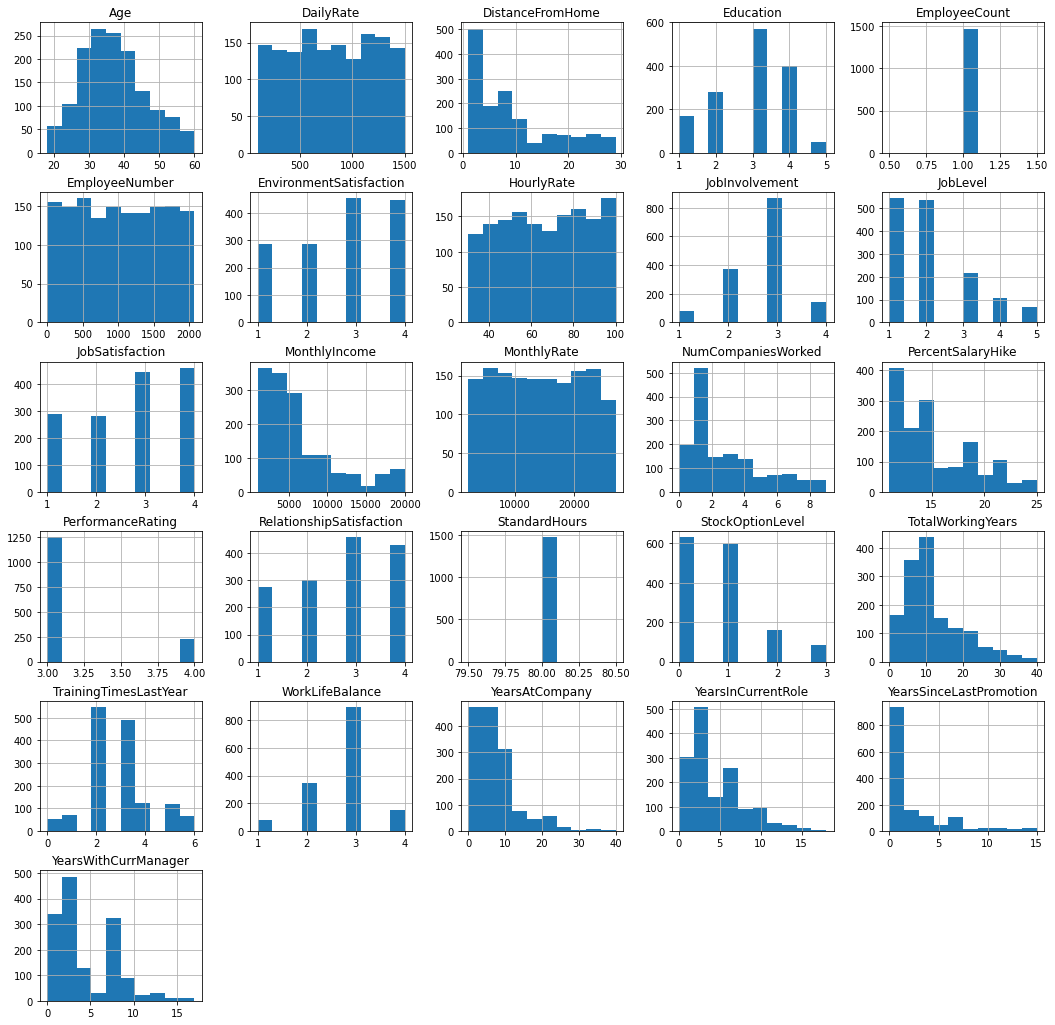

In [11]:
data.hist(bins=10, figsize=(18,18))
plt.plot()

* EmployeeCount, EmployeeNumber, StandardHours

In [20]:
data["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [13]:
data["EmployeeNumber"].values.ravel()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [15]:
data["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

Eliminating the following columns:
* EmployeeCount: Only take one value.
* EmployeeNumber: It is one index.
* StandardHours: Only take one value.

In [7]:
list_col_drop = ["EmployeeCount","EmployeeNumber","StandardHours"]

Show columns with **categorical values**:

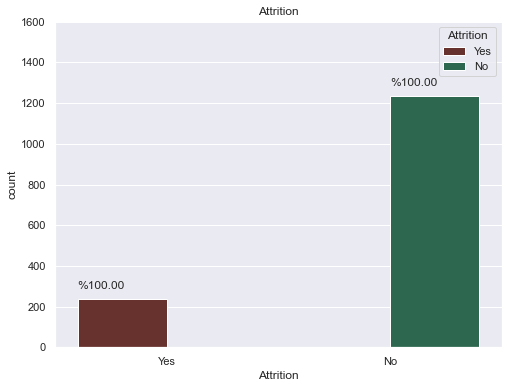

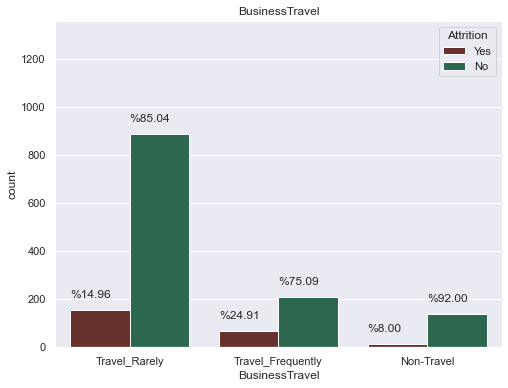

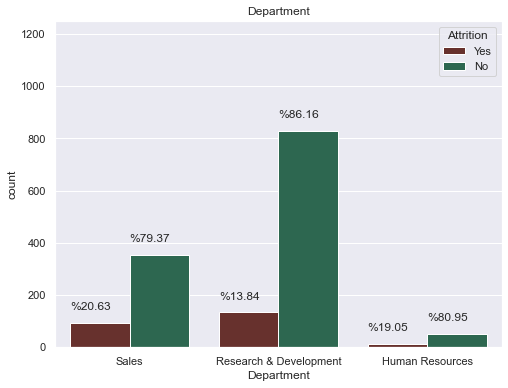

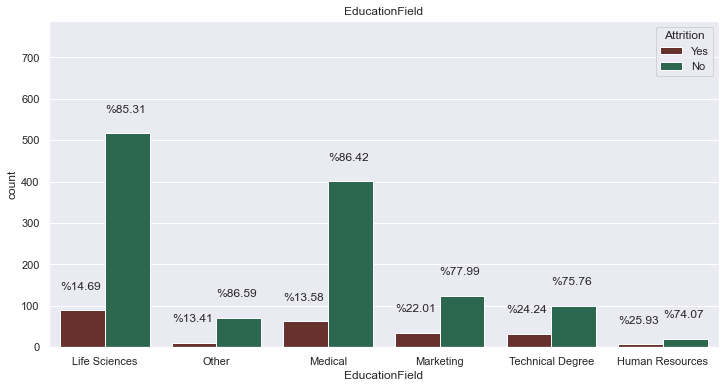

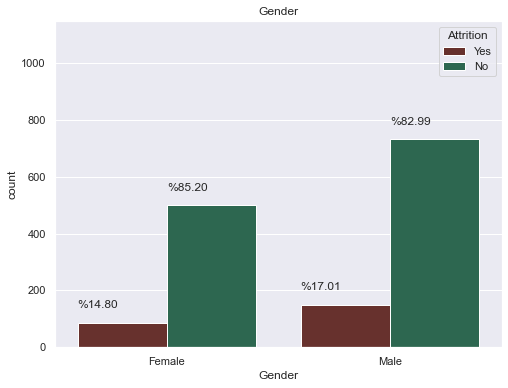

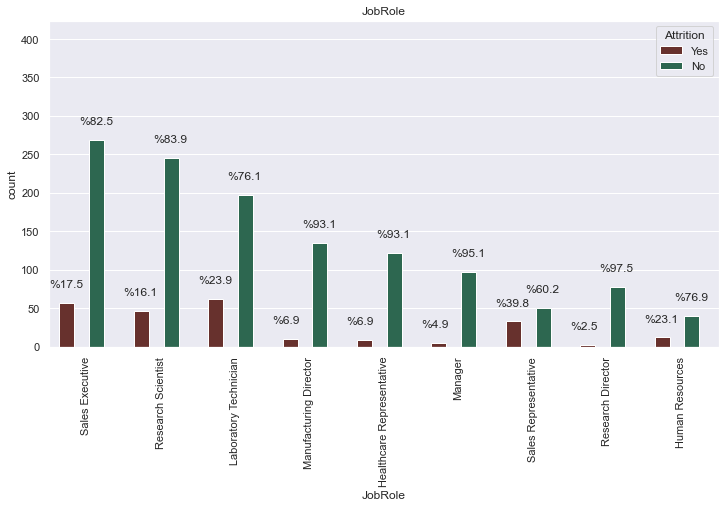

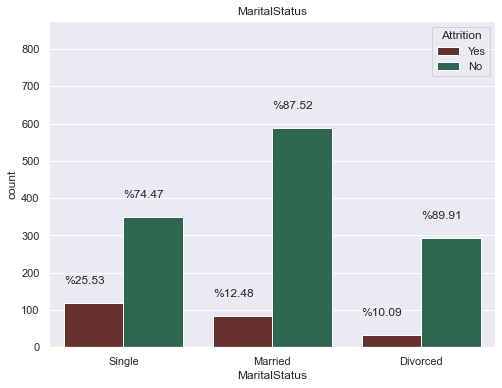

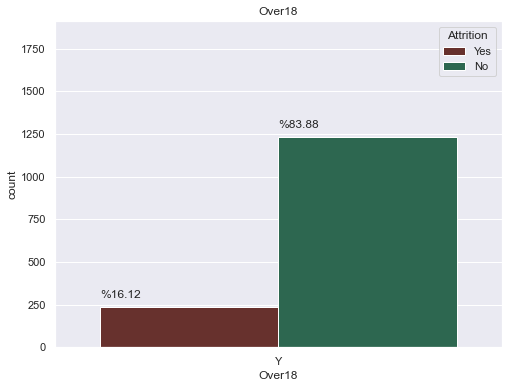

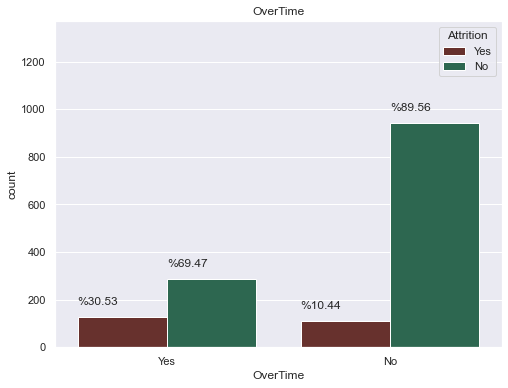

In [27]:
col = data.select_dtypes(include=["object"]).columns
for i in col:  # columns
    
    # set size and style
    sns.set_theme(style="darkgrid")
    cats  = data[i].unique() 
    if len(cats)>4:
        plt.figure(figsize=(12,6))
    elif len(cats)>6:
        plt.figure(figsize=(30,6))          
    else: plt.figure(figsize=(8,6))
   
    # make fig
    ax = sns.countplot(x = i, hue="Attrition", data=data.select_dtypes(include=["object"]), palette=['#712823',"#237152"] ) 
    
    # categories
    lis2=[]
    for j in data[i].unique():  
        lis2.append(len(data[data[i]==j]))
    plt.ylim(0,max(lis2)+max(lis2)*30/100)   
        
    # changes set if num categories and labels are many
    if max(len(x) for x in data[i].unique())>8 and len(cats)>6:
        ax.tick_params(axis='x', rotation=90)
        for p,l in zip(ax.patches,lis2*2):
            current_width = p.get_width()
            new_value = current_width*50/100
            ax.annotate('%{:.1f}'.format(p.get_height()/l*100), (p.get_x()-0.1, p.get_height()+20))
            p.set_width(new_value)
            p.set_x(p.get_x()+ (current_width-new_value)*0.2)
    else : 
        for p,l in zip(ax.patches,lis2*2):
            ax.annotate('%{:.2f}'.format(p.get_height()/l*100), (p.get_x(), p.get_height()+50))
        
    plt.title(i)
    plt.show()

## Conclusion in sight:
* **Business Travel**: There are more people that quit work in "Travel frequently", but in "Non travel" happen the opposite case.
* **Deparment**: "Sales" quit work more.
* **Eduaction field**: In "Marketing", "Technical Degree" and "Human Resources" there are more resignations.
* **Gender**: There are slightly more "Male" who quit their work.
* **Job rol**:  the people from "Sales Representative" are more in quit work, follow by laboratory Technician and human resources.
* **Marital status**: "Single" quit more.
* **Over Time**: The people that work over time quit work.

Carry out a survey to find the causes

Eliminating the following columns.
* "Over18" does not contribute anything.

In [8]:
list_col_drop.append("Over18")

In [9]:
data.drop(labels=list_col_drop, axis=1, inplace=True)

In [10]:
col_numeric = data.select_dtypes(include=['int64']).columns
col_catg = data.select_dtypes(include=["object"]).columns

In [11]:
len(data.columns)==len(col_catg)+len(col_numeric)

True

In [12]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0


### Distribution 

In [42]:
data["Age"].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    24.0
0.25    30.0
0.50    36.0
0.75    43.0
0.95    54.0
Name: Age, dtype: float64

Show distributions, select the column.

In [35]:
col_numeric

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [36]:
# select the column for analysis
y ="MonthlyIncome"  # numerica column

<Figure size 1080x576 with 0 Axes>

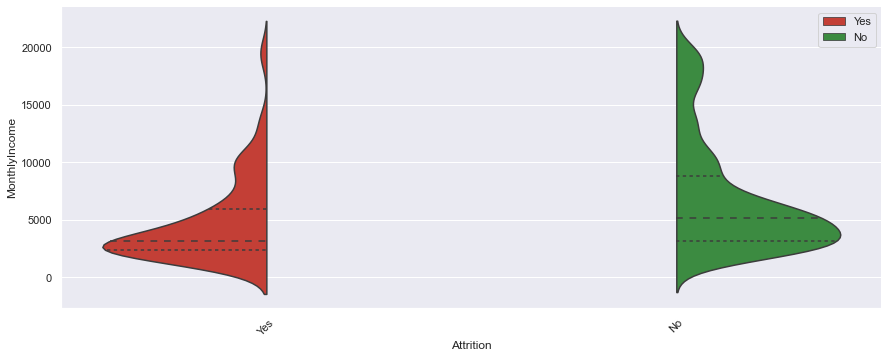

<Figure size 1080x576 with 0 Axes>

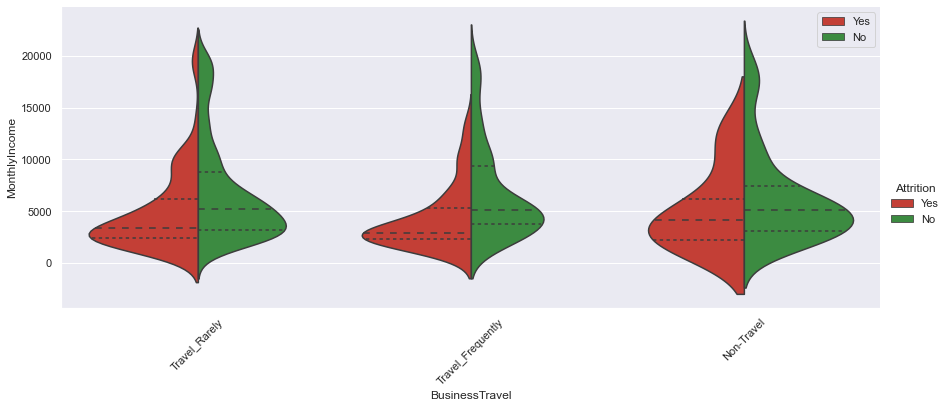

<Figure size 1080x576 with 0 Axes>

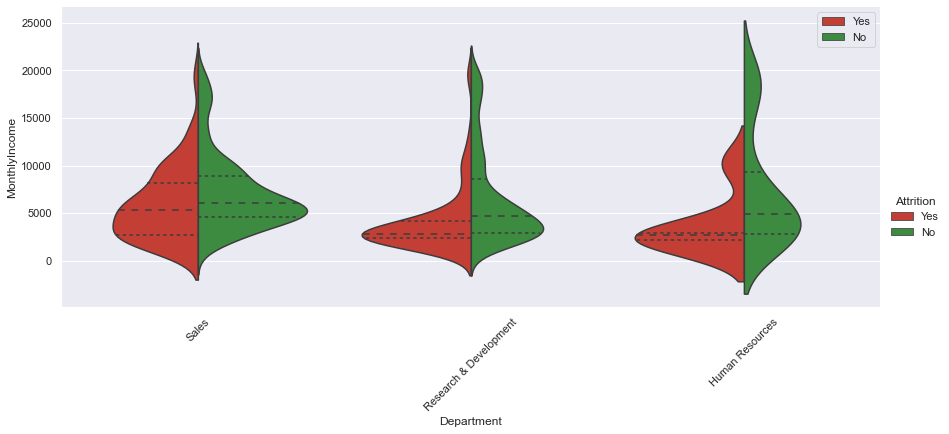

<Figure size 1080x576 with 0 Axes>

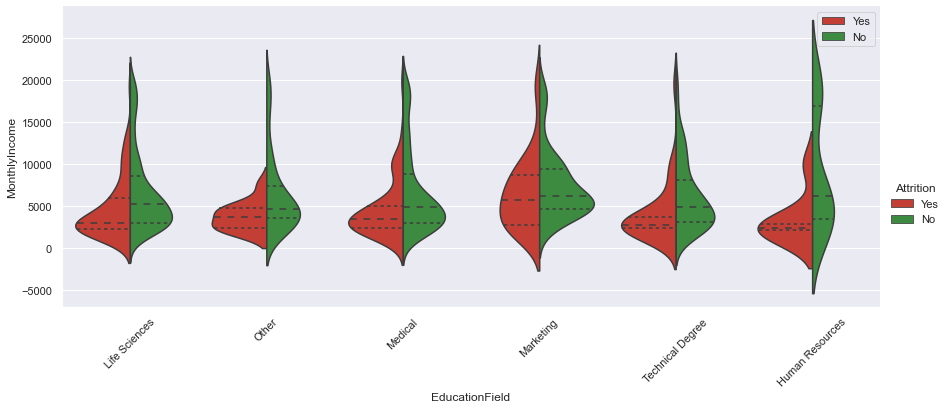

<Figure size 1080x576 with 0 Axes>

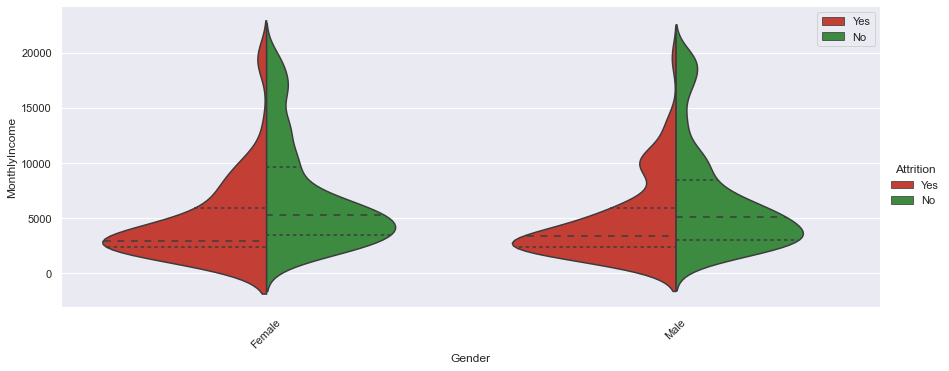

<Figure size 1080x576 with 0 Axes>

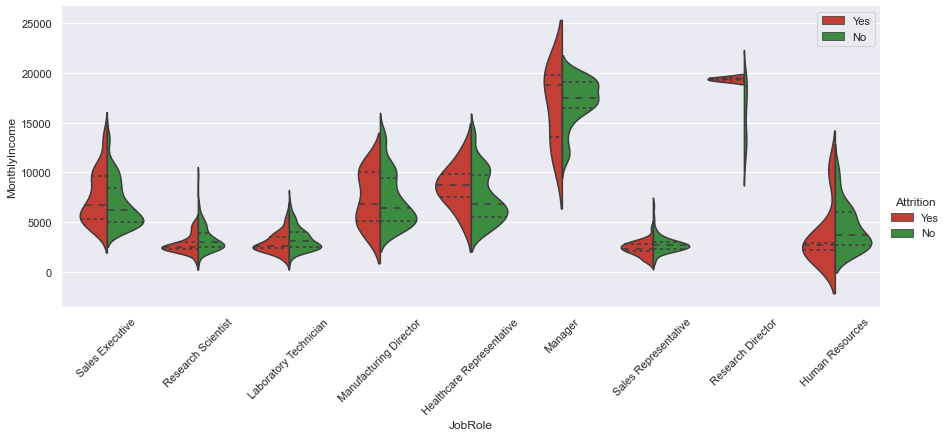

<Figure size 1080x576 with 0 Axes>

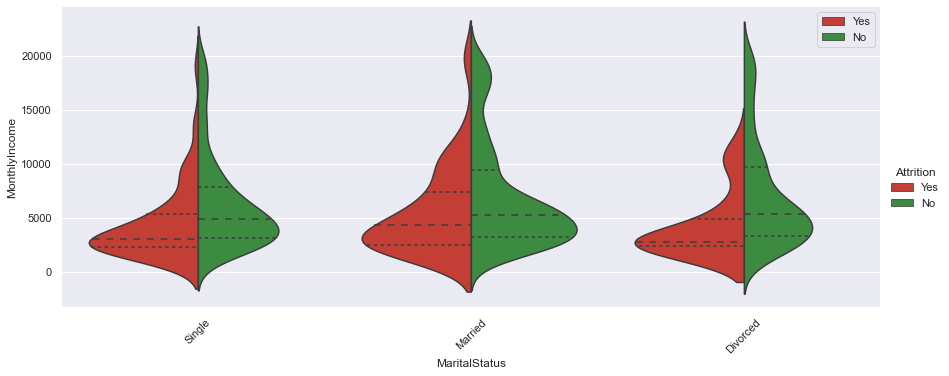

<Figure size 1080x576 with 0 Axes>

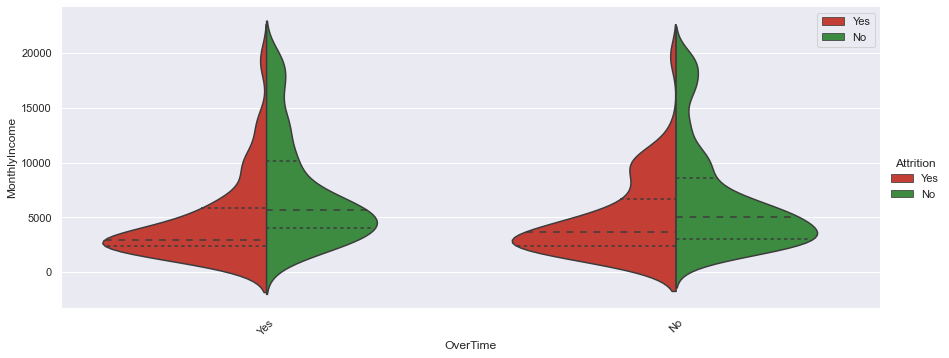

In [37]:
for i in col_catg:
    sns.set_style("darkgrid")
    plt.figure(figsize = (15,8))
    ax = sns.catplot(x=i, y=y, hue="Attrition", kind="violin", inner="quartile", split=True, data=data,
                height=5, aspect=2.5, palette=['#db2b1e',"#2f9836"])
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

this requires more analysis, depending of the ask.

### Correlations

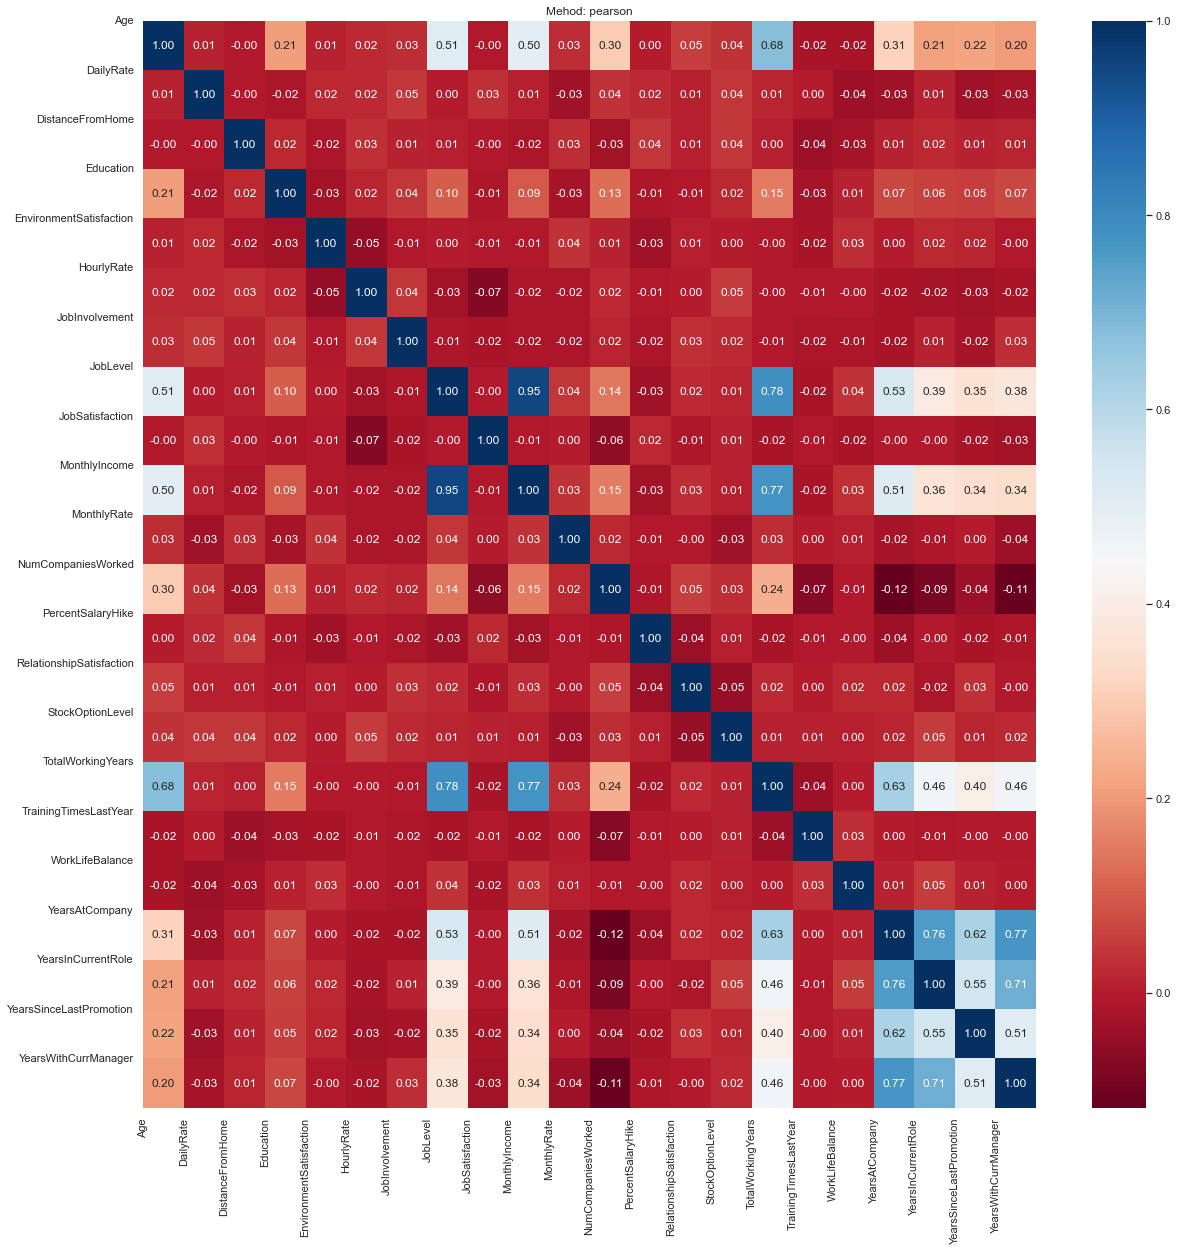

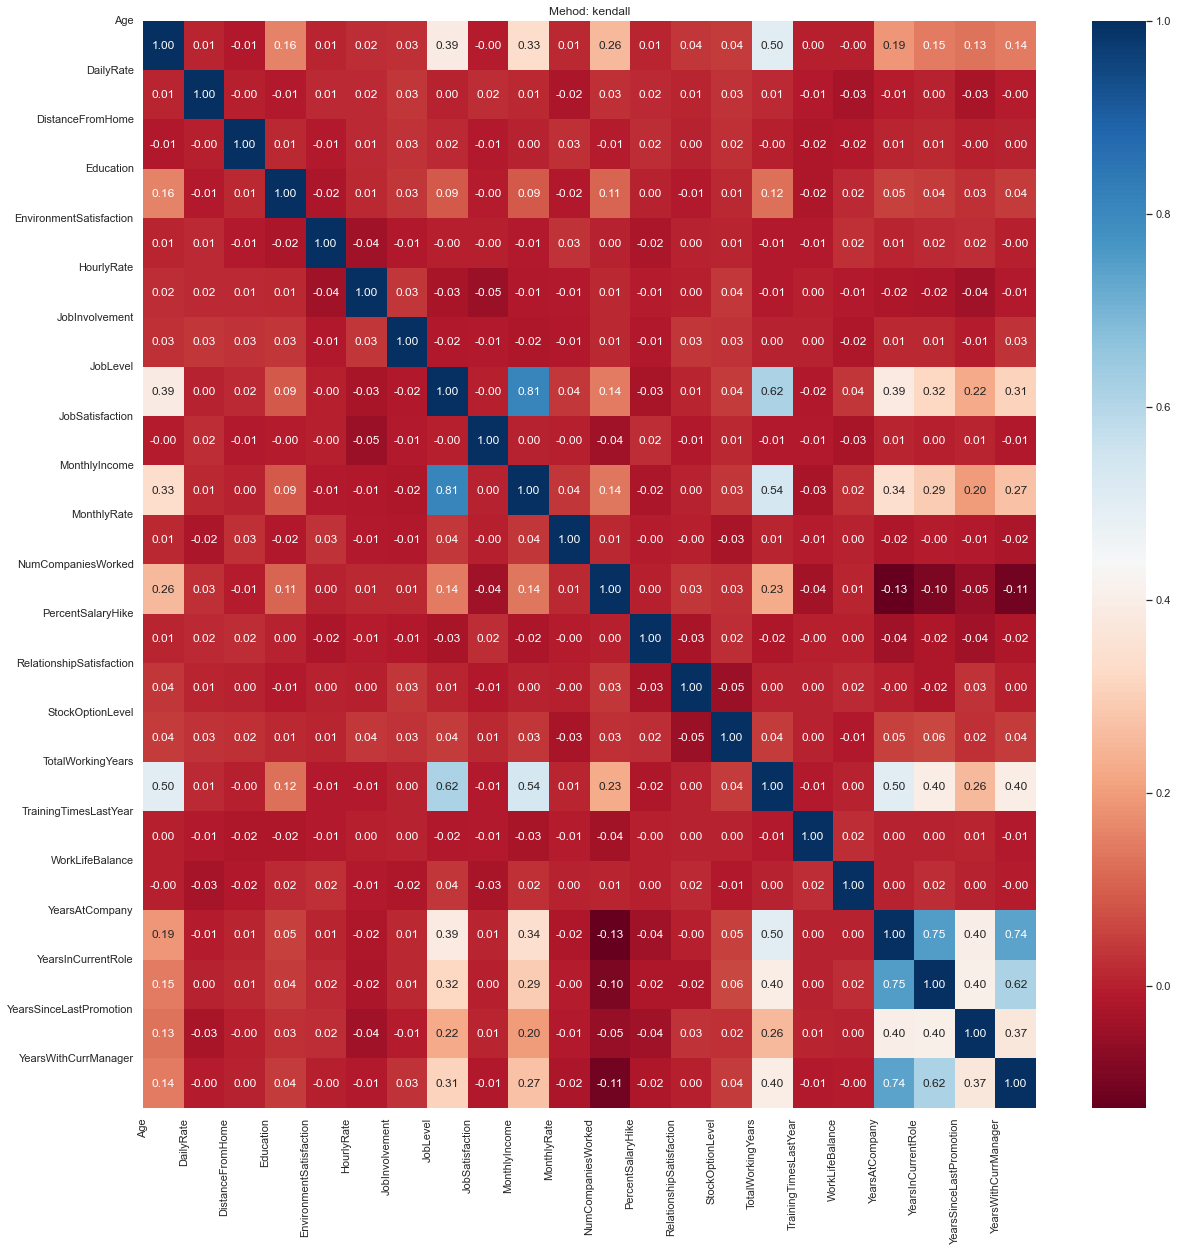

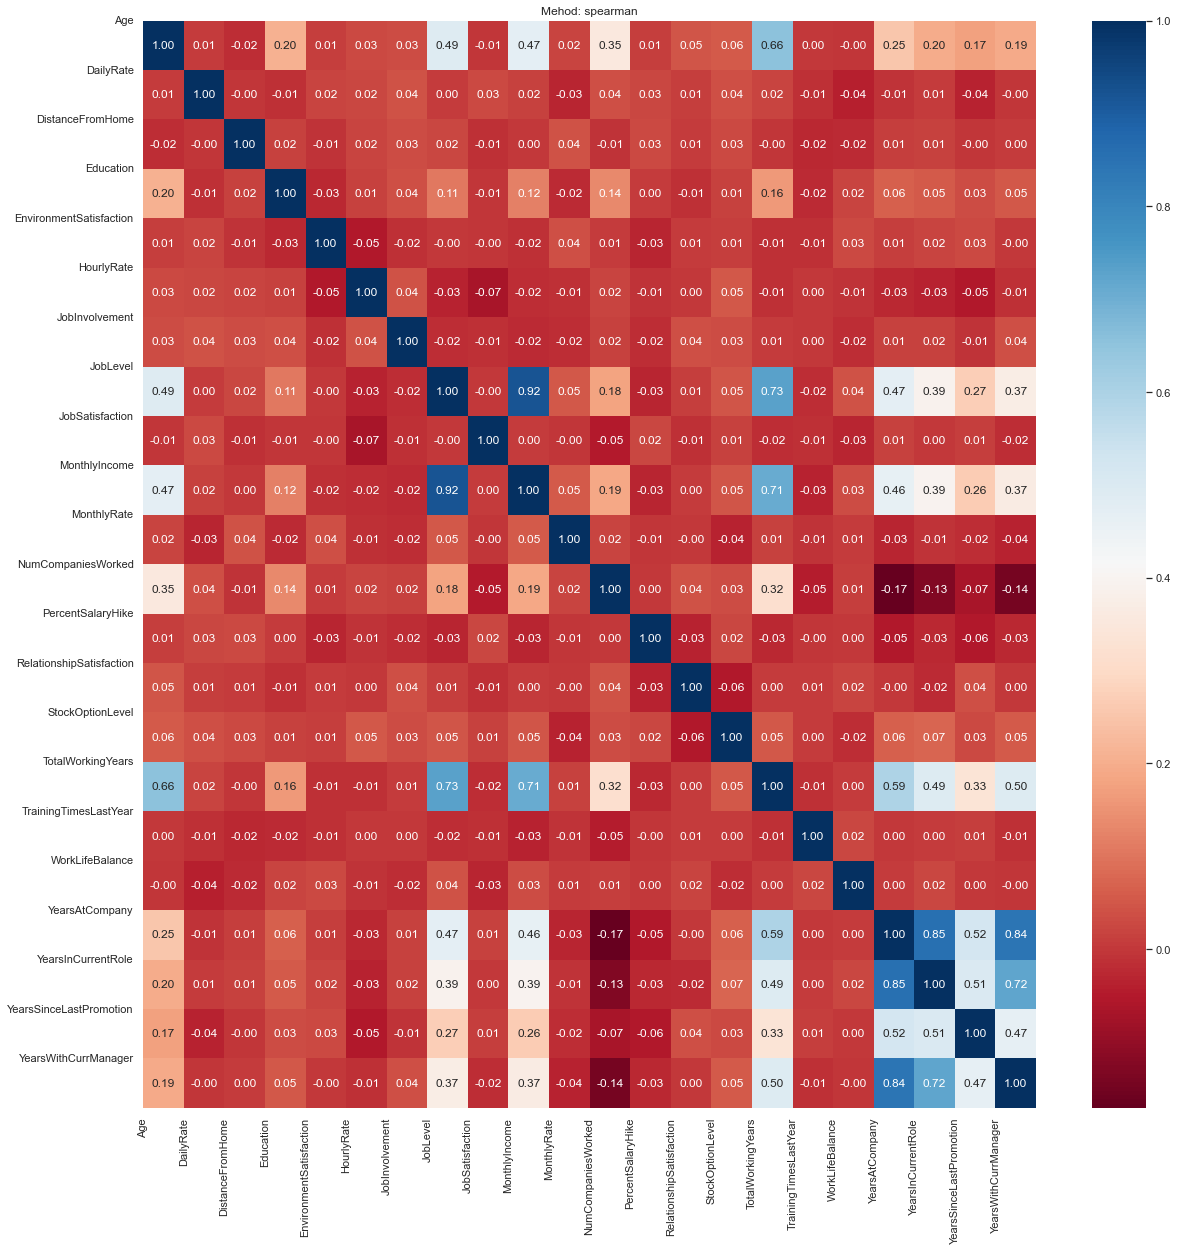

In [70]:
met_corr = ["pearson", "kendall", "spearman"]
for i in met_corr :
    corr = data.corr(i)
    f, ax = plt.subplots(figsize = (20,20))
    sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
    plt.title("Mehod: "+i)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

Correlation between :
* Year at company and Total work years.

## Preparation for ML and DL

In [13]:
from sklearn.preprocessing import OneHotEncoder

### Categorical columns to columns numeric

* Change column  "Attrition" to numeric value (0,1)

In [14]:
# data.loc[data["Attrition"]=="Yes" , "Attrition"]
# data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data["Attrition"].replace(to_replace=("Yes","No"), value=(1,0), inplace=True)

col_catg    = data.select_dtypes(include=["object"]).columns
col_numeric = data.select_dtypes(include=["int"]).columns

* Change columns categoricals to numeric

Look the number of categorical values in the data.

In [15]:
num_cat=[]
for i in col_catg:
    num_cat.append(len(data[i].unique()))
print("Total number of categories from categorical columns: ", sum(num_cat))
print("Numbers of columns from OneCodeEncoder() applied to categorical columns: ",
      OneHotEncoder().fit_transform(data[col_catg]).toarray().shape[1])
del num_cat,i

Total number of categories from categorical columns:  28
Numbers of columns from OneCodeEncoder() applied to categorical columns:  28


Expected columns with their categorics

In [16]:
data_encoder = data.drop(labels=col_catg, axis=1, inplace=False)
for i in col_catg.values:
    dumi_df = OneHotEncoder().fit_transform(data[i].values.reshape(-1, 1)).toarray()  # or data[[i]]
    cols=[]
    for categoria in data[i].unique():
        cols.append(categoria)
    print(i+" : ",cols)
    data_encoder =  pd.concat([data_encoder, pd.DataFrame(dumi_df, columns=cols)], axis=1)
del cols, dumi_df, i, categoria

BusinessTravel :  ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Department :  ['Sales', 'Research & Development', 'Human Resources']
EducationField :  ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
Gender :  ['Female', 'Male']
JobRole :  ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
MaritalStatus :  ['Single', 'Married', 'Divorced']
OverTime :  ['Yes', 'No']


In [17]:
len(data_encoder.columns)

52

In [18]:
len(data_encoder.columns) == len(col_numeric)+OneHotEncoder().fit_transform(data[col_catg]).toarray().shape[1]

True

In [19]:
pd.set_option('display.max_columns', None)
data_encoder.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Rarely,Travel_Frequently,Non-Travel,Sales,Research & Development,Human Resources,Life Sciences,Other,Medical,Marketing,Technical Degree,Human Resources,Female,Male,Sales Executive,Research Scientist,Laboratory Technician,Manufacturing Director,Healthcare Representative,Manager,Sales Representative,Research Director,Human Resources,Single,Married,Divorced,Yes,No
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Train and test data

Review the objective

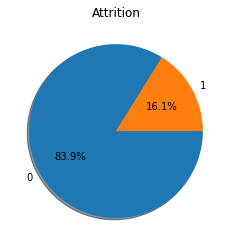

In [20]:
a =data_encoder["Attrition"].value_counts().values
b =data_encoder["Attrition"].value_counts().index
plt.pie(a, labels=b, counterclock=False, shadow=True,
        autopct='%1.1f%%', radius=1, startangle=0)
plt.title("Attrition")
plt.show()
del a,b

Show imbalanced data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

* Separating predictor and objetive

In [22]:
X = data_encoder.drop(labels=["Attrition"], axis=1, inplace=False)
Y = data_encoder[["Attrition"]]

* Scaling data

In [24]:
X = MinMaxScaler().fit_transform(X)

* Split data in data train and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state=2022, shuffle=True, stratify=Y)

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

* Evaluatin for diferent values of $\alpha$

In [27]:
alpha = np.linspace(0,0.1,10)
accuracy_train =[]
accuracy_test =[]
for i in alpha:
    model = RandomForestClassifier(n_estimators=200, criterion='gini',
                               max_features = "sqrt", max_samples = 0.8,
                               bootstrap = True, oob_score = True, random_state = 2022,
                               ccp_alpha = i  )
    model.fit(X_train, y_train.values.ravel())
    
    accuracy_test.append( accuracy_score(y_test, model.predict(X_test))   )
    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)) )

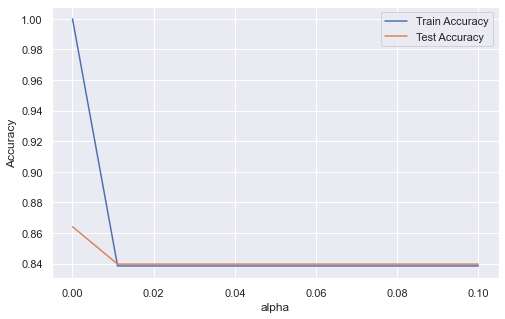

In [28]:
sns.set()
plt.figure(figsize=(8,5))
sns.lineplot(y=accuracy_train,x=alpha,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alpha,label="Test Accuracy")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.show()

**Obs:** changing the sampling X_train and Y_train is obteined other values, but $\alpha$ is maintained

### Selecting model

* Selecting the model with $\alpha=0.02$

In [29]:
model = RandomForestClassifier(n_estimators=200, criterion='gini',
                               max_features = "sqrt", max_samples = 0.8,
                               bootstrap = True, oob_score = True, random_state = 2022,
                               ccp_alpha = 0.02  )
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(ccp_alpha=0.02, max_features='sqrt', max_samples=0.8,
                       n_estimators=200, oob_score=True, random_state=2022)

* Checking the categories with mayor importance for this model

In [30]:
# catgories 
features = data_encoder.columns.values
features = np.delete(features, np.where(features=="Attrition")[0])

# importances of categories
importance = model.feature_importances_

# criteri importance > 0.03
criterio = importance > 0.03
importance = importance[criterio]
features = features[criterio]

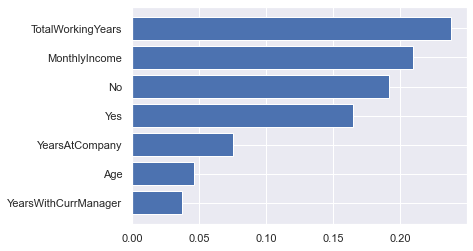

In [31]:
sort = np.argsort(importance)
plt.barh(features[sort], importance[sort])
del sort

**Obs:** Changing the X_train, change the weight

<AxesSubplot:>

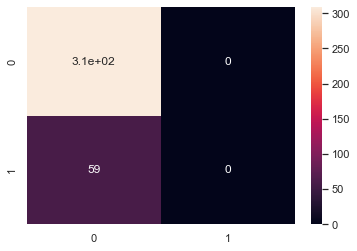

In [32]:
cm = confusion_matrix( y_test, model.predict(X_test))
sns.heatmap(cm, annot=True)

Show effects from imbalanced data

### Threshold

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [34]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_score)
specificity = 1-fpr
recall = tpr

**ROC**

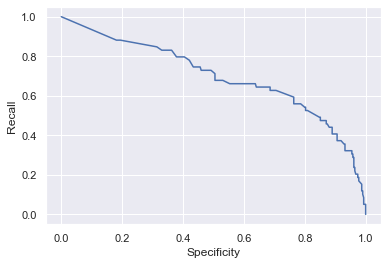

ROC score: 0.6972464483571937


In [35]:
plt.plot(specificity,recall)
plt.xlabel("Specificity")  # 1-specifity=false positive rate
plt.ylabel("Recall") 
plt.show()
print("ROC score:" ,roc_auc_score(y_test,y_score) )

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

In [36]:
G_mean = np.sqrt(tpr * (1-fpr))
thresholds1=thresholds[np.argmax(G_mean)]
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1, G_mean[np.argmax(G_mean)]))

Best Threshold=0.170859, G-Mean=0.673


In [37]:
def point_off(score,point):
    score[score >= point]=1. 
    return score.astype("int")

### Evaluating

In [38]:
y_predict = point_off(score = y_score, point= thresholds1)

<AxesSubplot:>

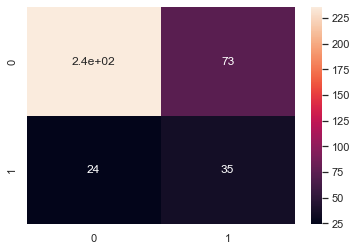

In [39]:
cm = confusion_matrix( y_test, y_predict)
sns.heatmap(cm, annot=True)

In [41]:
f1_score =2*recall*specificity/(recall+specificity) 
thresholds2 = thresholds[np.argmax(f1_score)]
print("Best threshild from F1_score: ", thresholds2)

Best threshild from F1_score:  0.1708585793604918


Similarly to G-mean.

## Deep Learning

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [47]:
X_train.shape

(1102, 51)

### Selecting model

In [48]:
model = Sequential()

model.add(Dense(51, input_dim=51, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(20, kernel_initializer="he_normal",use_bias=False, activation="elu"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 51)                2652      
                                                                 
 batch_normalization_2 (Batc  (None, 51)               204       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 batch_normalization_3 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,977
Trainable params: 3,835
Non-traina

### Trainig model

In [49]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 0.8548 - accuracy: 0.5054
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.6080
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6615
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7114
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7477
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.7768
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.8013
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.8276
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.8530
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.8566
Epoch 11/

12/12 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9555
Epoch 84/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.9564
Epoch 85/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9619
Epoch 86/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9619
Epoch 87/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9583
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9619
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9619
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9583
Epoch 91/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9601
Epoch 92/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9637
Epoch 93/100


In [50]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.8261
Accuracy: 82.61


### Evaluating

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

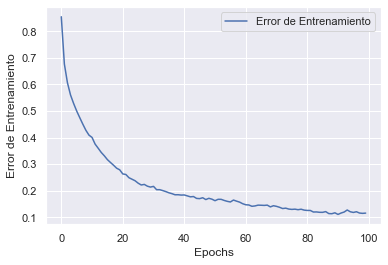

In [57]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

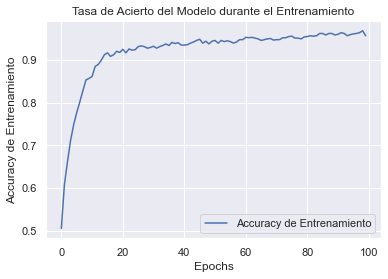

In [53]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

12/12 [==============================] - 0s 2ms/step


<AxesSubplot:>

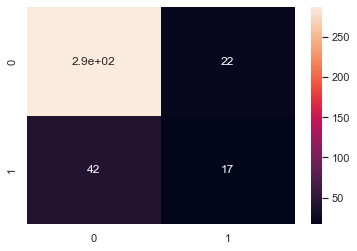

In [58]:
cm = confusion_matrix(y_test, model.predict(X_test)>0.5)
sns.heatmap(cm, annot=True)

In [62]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,model.predict(X_test)>0.5 ))

12/12 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       309
           1       0.44      0.29      0.35        59

    accuracy                           0.83       368
   macro avg       0.65      0.61      0.62       368
weighted avg       0.80      0.83      0.81       368

